In [1]:
import numpy as np
import numpy.ma as nm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import sys

sys.path.insert(0, '/scratch/fivanovic/Work/X-SH/eigenstate_plotting')
import XSH_eigenstates_Filip as XSF

In [2]:
def find_dissociation_index(iterable, population_threshold, post_dissoc_elements, post_dissoc_buffer):

    for outer_index in range(len(iterable)):

        if iterable[outer_index] < population_threshold:

            for inner_val in iterable[outer_index: outer_index + post_dissoc_elements]:

                if inner_val > population_threshold + post_dissoc_buffer:
                    
                    fluctuation = True
                    break

                else:
                    fluctuation = False

            if not fluctuation:

                return outer_index
            
    return None

In [3]:
def dissociation_speed(iterable, dissociation_index, population_theshold):

    truncated_interable = iterable[:dissociation_index]

    XT_indices = np.where(truncated_interable > population_theshold)[0]
    if np.any(XT_indices):
        dissociation_start_point = np.max(XT_indices)
    else:
        return None

    return (dissociation_index - dissociation_start_point)

In [12]:
file_marker = 'physopt_retry'
analysis_path = f'/scratch/fivanovic/X-SH/T6-PDI/production_runs/energy_landscape/{file_marker}_t_dependent_eigens'
nuclear_timestep = 0.05

simulation = 'physical_system_optical_retry'

In [13]:
ct_energies = np.loadtxt(analysis_path + f'/eigenstate_populations/{file_marker}_CT_site_energies-p.txt')[:, 1:]
ict_energies = np.loadtxt(analysis_path + f'/eigenstate_populations/{file_marker}_iCT_site_energies-p.txt')[:, 1:]
xt_energies = np.loadtxt(analysis_path + f'/eigenstate_populations/{file_marker}_XT_site_energies-p.txt')[:, 1:]

active_state_energies = np.loadtxt(analysis_path + f'/eigenstate_populations/{file_marker}_active_rel_energy-p.txt')[:, 1:]
active_state_energies_noHband = np.loadtxt(analysis_path + f'/eigenstate_populations/{file_marker}_active_rel_energy-p.txt')[:,1:]
active_absolute_rank = np.loadtxt(analysis_path + f'/eigenstate_populations/{file_marker}_active_Erank-p.txt')[:, 1:]

In [14]:
total_XT_single_populations = np.loadtxt(f'/scratch/fivanovic/X-SH/T6-PDI/production_runs/{simulation}/analysis_arrays/{file_marker}_XT_individual_populations.txt')
XT_single_IPR = np.loadtxt(f'/scratch/fivanovic/X-SH/T6-PDI/production_runs/{simulation}/analysis_arrays/{file_marker}_individual_exciton_IPR.txt')
hole_single_IPR = np.loadtxt(f'/scratch/fivanovic/X-SH/T6-PDI/production_runs/{simulation}/analysis_arrays/{file_marker}_individual_hole_IPR.txt')
electron_single_IPR = np.loadtxt(f'/scratch/fivanovic/X-SH/T6-PDI/production_runs/{simulation}/analysis_arrays/{file_marker}_individual_electron_IPR.txt')

electron_single_locations = np.loadtxt(f'/scratch/fivanovic/X-SH/T6-PDI/production_runs/{simulation}/analysis_arrays/{file_marker}_individual_electron_locations.txt')
hole_single_locations = np.loadtxt(f'/scratch/fivanovic/X-SH/T6-PDI/production_runs/{simulation}/analysis_arrays/{file_marker}_individual_hole_locations.txt')

In [ ]:
sample_length = 400
dissoc_array_length = 800

dissoc_ct_energy_array = np.zeros((len(ct_energies), dissoc_array_length))
dissoc_ict_energy_array = np.zeros((len(ict_energies), dissoc_array_length))
dissoc_hole_IPR_array = np.zeros((len(hole_single_IPR), dissoc_array_length))
dissoc_electron_IPR_array = np.zeros((len(electron_single_IPR), dissoc_array_length))

dissoc_exciton_pop_array = np.zeros((len(total_XT_single_populations), dissoc_array_length))
dissoc_exciton_IPR_array = np.zeros((len(XT_single_IPR), dissoc_array_length))
dissoc_abs_rank_array = np.zeros((len(active_absolute_rank), dissoc_array_length))
dissoc_act_energy_array = np.ones((len(active_state_energies), dissoc_array_length))
dissoc_E_rel_ict_array = np.ones((len(active_state_energies), dissoc_array_length)) #array of ones here bc this is active-state energy relative to ground state, many elements are zero
#so specifying array of zeros washes away timesteps when active state is the ground state


for index in range(len(total_XT_single_populations)):

    shading_parameter = 1 - index/len(total_XT_single_populations)

    XT_dissociation_index = find_dissociation_index(total_XT_single_populations[index], 0.05, 1000, 0.50)

    if XT_dissociation_index:

        dissociation_length = dissociation_speed(total_XT_single_populations[index], XT_dissociation_index, 0.95)

        if dissociation_length:

            dissociation_window = total_XT_single_populations[index][XT_dissociation_index - dissociation_length : XT_dissociation_index + 1]
            print(hole_single_IPR[index,XT_dissociation_index])

            dissociation_exciton_pop = total_XT_single_populations[index][XT_dissociation_index - sample_length : XT_dissociation_index + sample_length]
            dissoc_exciton_pop_array[index, :len(dissociation_exciton_pop)] = dissociation_exciton_pop

            dissociation_exciton_IPR = XT_single_IPR[index][XT_dissociation_index - sample_length : XT_dissociation_index + sample_length]
            dissoc_exciton_IPR_array[index, :len(dissociation_exciton_IPR)] = dissociation_exciton_IPR

            dissociation_hole_IPR = hole_single_IPR[index][XT_dissociation_index - sample_length : XT_dissociation_index + sample_length]
            dissoc_hole_IPR_array[index, :len(dissociation_hole_IPR)] = dissociation_hole_IPR
            
            dissociation_electron_IPR = electron_single_IPR[index][XT_dissociation_index - sample_length : XT_dissociation_index + sample_length]
            dissoc_electron_IPR_array[index, :len(dissociation_electron_IPR)] = dissociation_electron_IPR

            dissociation_abs_rank = active_absolute_rank[index][XT_dissociation_index - sample_length : XT_dissociation_index + sample_length]
            dissoc_abs_rank_array[index, :len(dissociation_abs_rank)] = dissociation_abs_rank

            dissociation_active_energy = active_state_energies[index][XT_dissociation_index - sample_length: XT_dissociation_index + sample_length]
            dissoc_act_energy_array[index, :len(dissociation_active_energy)] = dissociation_active_energy

            dissociation_ct_energy = ct_energies[index][XT_dissociation_index - sample_length : XT_dissociation_index + sample_length]
            dissociation_ict_energy = ict_energies[index][XT_dissociation_index - sample_length : XT_dissociation_index + sample_length]
            
            dissoc_ct_energy_array[index, :len(dissociation_ct_energy)] = dissociation_ct_energy
            dissoc_ict_energy_array[index, :len(dissociation_ict_energy)] = dissociation_ict_energy

In [16]:
masked_exciton_IPR = nm.masked_values(dissoc_exciton_IPR_array, 0)
mean_exciton_dissoc_IPR = nm.mean(masked_exciton_IPR, axis=0)

masked_electron_IPR = nm.masked_values(dissoc_electron_IPR_array, 0)
mean_electron_dissoc_IPR = nm.mean(masked_electron_IPR, axis=0)

masked_hole_IPR = nm.masked_values(dissoc_hole_IPR_array, 0)
mean_hole_dissoc_IPR = nm.mean(masked_hole_IPR, axis=0)

masked_energy_ranks = nm.masked_values(dissoc_abs_rank_array, 0)
mean_energy_ranks = nm.mean(masked_energy_ranks, axis=0)

masked_exciton_pop = nm.masked_values(dissoc_exciton_pop_array, 0)
mean_dissoc_population = np.mean(masked_exciton_pop, axis=0)

masked_active_energies = nm.masked_values(dissoc_act_energy_array, 1) #mask set to 1 because array initialised as ones instead of zeros
mean_active_energies = nm.mean(masked_active_energies, axis=0)

masked_active_E_rel_ict = nm.masked_values(dissoc_E_rel_ict_array, 1) #mask set to 1 because array initialised as ones instead of zeros
mean_active_E_rel_ict = nm.mean(masked_active_E_rel_ict, axis=0)

masked_dissoc_ct_energy = nm.masked_values(dissoc_ct_energy_array, 0)
mean_dissoc_ct_energy = nm.mean(masked_dissoc_ct_energy, axis=0)

masked_dissoc_ict_energy = nm.masked_values(dissoc_ict_energy_array, 0)
mean_dissoc_ict_energy = nm.mean(masked_dissoc_ict_energy, axis=0)

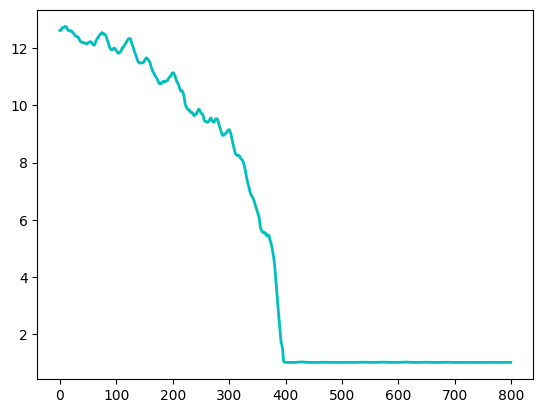

In [17]:
plt.plot(np.arange(800), mean_hole_dissoc_IPR, color='c', linewidth=2)

In [56]:
excitonic_indices = np.where(total_XT_single_populations[:,:19499] > 0.95)
excitonic_IPR_vals = XT_single_IPR[excitonic_indices[0], excitonic_indices[1]]
mean_exciton_IPR = np.mean(excitonic_IPR_vals)

excitonic_state_energies = active_state_energies[excitonic_indices[0], excitonic_indices[1]]
mean_excitonic_energy = np.mean(excitonic_state_energies)

excitonic_energy_rank = active_absolute_rank[excitonic_indices[0], excitonic_indices[1]]
mean_excitonic_Erank = np.mean(excitonic_energy_rank)

full_dissoc_index = np.where(mean_dissoc_population < 0.05)[0][0]
start_dissoc_index = np.where(mean_dissoc_population < 0.95)[0][0]

In [57]:
dissociated_indices = np.where(total_XT_single_populations[:,:19499] < 0.05)
dissociated_eIPR_vals = electron_single_IPR[dissociated_indices[0], dissociated_indices[1]]
dissociated_hIPR_vals = hole_single_IPR[dissociated_indices[0], dissociated_indices[1]]

mean_eIPR = np.mean(dissociated_eIPR_vals)
mean_hIPR = np.mean(dissociated_hIPR_vals)

dissociated_ct_energies = ct_energies[dissociated_indices[0], dissociated_indices[1]]
dissociated_ict_energies = ict_energies[dissociated_indices[0], dissociated_indices[1]]
mean_ct_energy = np.mean(dissociated_ct_energies)
mean_ict_energy = np.mean(dissociated_ict_energies)

dissociated_energy_rank = active_absolute_rank[dissociated_indices[0], dissociated_indices[1]]
dissociated_active_energy = active_state_energies[dissociated_indices[0], dissociated_indices[1]]
mean_dissociated_Erank = np.mean(dissociated_energy_rank)
mean_dissociated_energy = np.mean(dissociated_active_energy)

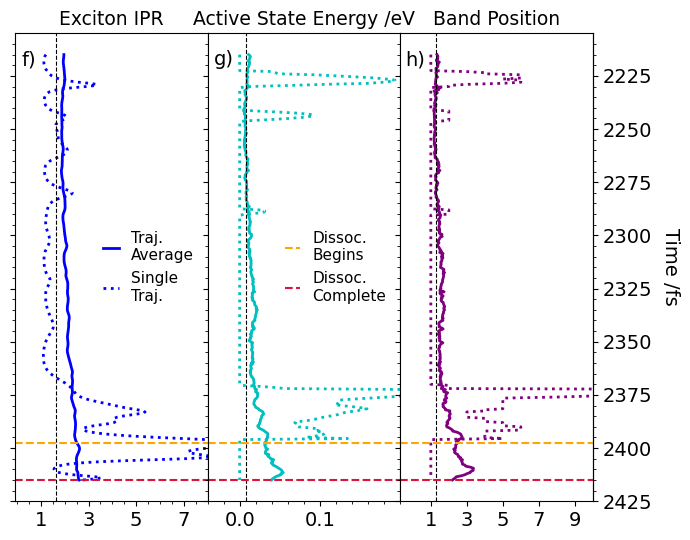

In [42]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(7,5.5))

time_axis = np.arange(4830-full_dissoc_index,4830+1)*10*0.05

axs[0].plot(mean_exciton_dissoc_IPR[:full_dissoc_index+1], time_axis, color='b', linewidth=2, label = 'Traj.' + '\n' + 'Average')
axs[0].plot(XT_single_IPR[195, 4830-full_dissoc_index:4830+1], time_axis, color='b', linestyle='dotted', linewidth=2, label = 'Single' + '\n' + 'Traj.')
axs[0].axvline(mean_exciton_IPR, color='k', linestyle='--', linewidth=0.8)
axs[0].axhline(time_axis[-1], color='crimson', linestyle='--')
axs[0].axhline(time_axis[start_dissoc_index], color='orange', linestyle='--')
axs[0].set_title('Exciton IPR', fontsize=13.5)
axs[0].set_xlim([-0.1,8])
axs[0].minorticks_on()
axs[0].xaxis.set_tick_params(labelsize = 14)
axs[0].set_yticklabels([])
axs[0].invert_yaxis()
axs[0].set_xticks([1,3,5,7])
axs[0].text(0.2, 2220, 'f)', fontsize=14)
axs[0].legend(loc='right', fontsize=11, frameon=False, handlelength=1)

axs[1].plot(mean_active_energies[:full_dissoc_index+1]*27.211, time_axis, color='c', linewidth=2)
axs[1].plot(active_state_energies[195, 4830-full_dissoc_index:4830+1]*27.211, time_axis, color='c', linestyle='dotted', linewidth=2)
axs[1].axvline(mean_excitonic_energy*27.211, color='k', linestyle='--', linewidth=0.8)
axs[1].axhline(time_axis[start_dissoc_index], color='orange', linestyle='--', label = 'Dissoc.' + '\n' + 'Begins')
axs[1].axhline(time_axis[-1], color='crimson', linestyle='--', label = 'Dissoc.' + '\n' + 'Complete')
axs[1].set_title('Active State Energy /eV', fontsize=13.5)
axs[1].minorticks_on()
axs[1].set_xlim([-0.04,0.2])
axs[1].set_xticks([0.0, 0.1])
axs[1].yaxis.set_tick_params(labelsize = 14)
axs[1].xaxis.set_tick_params(labelsize = 14)
axs[1].invert_yaxis()
axs[1].text(-0.032, 2220, 'g)', fontsize=14)
axs[1].legend(loc='right', fontsize=11, frameon=False, handlelength=1)

axs[2].plot(mean_energy_ranks[:full_dissoc_index+1], time_axis, color='purple', label='Band position', linewidth=2)
axs[2].plot(active_absolute_rank[195, 4830-full_dissoc_index:4830+1], time_axis, color='purple', linestyle='dotted', linewidth=2)
axs[2].axvline(mean_excitonic_Erank, color='k', linestyle='--', label='Mean position before dissociation', linewidth=0.8)
axs[2].axhline(time_axis[-1], color='crimson', linestyle='--')
axs[2].axhline(time_axis[start_dissoc_index], color='orange', linestyle='--')
axs[2].set_title('Band Position', fontsize=13.5)
axs[2].yaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[2].set_xlim([-0.7,10])
axs[2].xaxis.set_tick_params(labelsize = 14)
axs[2].yaxis.set_tick_params(labelsize = 14)
axs[2].invert_yaxis()
axs[2].set_xticks([1,3,5,7,9])
axs[2].text(-0.4, 2220, 'h)', fontsize=14)

ax2_sec = axs[2].secondary_yaxis('right')
ax2_sec.yaxis.set_tick_params(labelsize = 14)
ax2_sec.set_ylabel('Time /fs', fontsize=14, rotation=270, labelpad=20)
#ax2_sec.set_ylim([4400,4620])
ax2_sec.yaxis.set_minor_locator(ticker.AutoMinorLocator())
#ax2_sec.set_yticks(np.arange(975,1200,25))

fig.tight_layout()
plt.subplots_adjust(wspace=0.0)

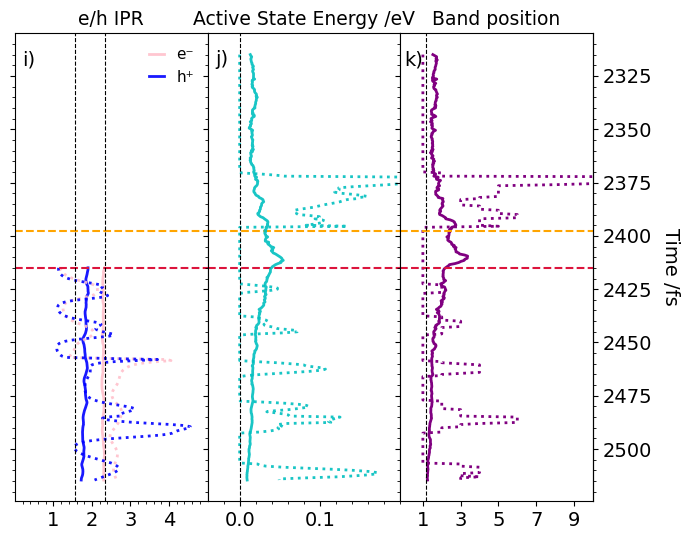

In [24]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(7,5.5), sharey=True)

time_axis = np.arange(4830-full_dissoc_index,4830+200)*10*0.05

axs[0].plot(mean_electron_dissoc_IPR[full_dissoc_index:full_dissoc_index+200], time_axis[full_dissoc_index:full_dissoc_index+200], color = 'pink', alpha = 0.9, linewidth=2, label = 'e\u207B')
axs[0].plot(mean_hole_dissoc_IPR[full_dissoc_index:full_dissoc_index+200], time_axis[full_dissoc_index:full_dissoc_index+200], color = 'b', alpha = 0.9, label = 'h\u207A', linewidth=2)
axs[0].plot(electron_single_IPR[195, 4830:4830+200], time_axis[full_dissoc_index:full_dissoc_index+200], color = 'pink', alpha = 0.9, linestyle='dotted', linewidth=2)
axs[0].plot(hole_single_IPR[195, 4830:4830+200], time_axis[full_dissoc_index:full_dissoc_index+200], color = 'b', alpha = 0.9, linestyle='dotted', linewidth=2)
axs[0].axhline(time_axis[full_dissoc_index], color='crimson', linestyle='--')
axs[0].axhline(time_axis[start_dissoc_index], color='orange', linestyle='--')
axs[0].axvline(mean_eIPR, color='k', linestyle='--', linewidth=0.8)
axs[0].axvline(mean_hIPR, color='k', linestyle='--', linewidth=0.8)
axs[0].set_title('e/h IPR', fontsize = 13.5)
axs[0].minorticks_on()
axs[0].xaxis.set_tick_params(labelsize = 14)
axs[0].invert_yaxis()
axs[0].set_yticks(np.arange(2300,2550,25))
axs[0].set_yticklabels([])
axs[0].set_xlim([0,5])
axs[0].set_xticks([1,2,3,4])
axs[0].text(0.2, 2320, 'i)', fontsize=14)
axs[0].legend(loc='upper right', fontsize=11, handlelength=1, frameon=False)


#axs[1].plot(mean_dissoc_ct_energy[200:600]*27.211, time_axis[200:], color = 'c', alpha = 0.9, label = 'All CT' + '\n' + 'States', linewidth=2)
#axs[1].plot(ct_energies[195, 4830-200:4830+200]*27.211, time_axis[200:], color = 'c', linestyle='dotted', linewidth=2)
#axs[1].plot(mean_dissoc_ict_energy[200:600]*27.211, time_axis[200:], color = 'tomato', alpha = 0.9, label = 'iCT State', linewidth=2)
#axs[1].plot(ict_energies[195, 4830-200:4830+200]*27.211, time_axis[200:], color = 'tomato', linestyle='dotted', linewidth=2)
axs[1].axhline(time_axis[full_dissoc_index], color='crimson', linestyle='--')
axs[1].axhline(time_axis[start_dissoc_index], color='orange', linestyle='--')
#axs[1].axvline(mean_ct_energy*27.211, color='k', linestyle='--', linewidth=0.8)
#axs[1].axvline(mean_ict_energy*27.211, color='k', linestyle='--', linewidth=0.8)
axs[1].plot(mean_active_energies[200:600]*27.211, time_axis[200:], color='c', alpha=0.9, linewidth=2)
axs[1].plot(active_state_energies[195, 4830-200:4830+200]*27.211, time_axis[200:], color='c', alpha=0.9, linewidth=2, linestyle='dotted')
axs[1].axvline(mean_dissociated_energy, color='k', linestyle='--', linewidth=0.8)
axs[1].set_title('Active State Energy /eV', fontsize = 13.5)
axs[1].minorticks_on()
axs[1].xaxis.set_tick_params(labelsize = 14)
axs[1].yaxis.set_tick_params(labelsize = 14)
axs[1].set_xticks([0.0,0.1])
axs[1].invert_yaxis()
axs[1].set_xlim([-0.04,0.2])
axs[1].text(-0.03, 2320, 'j)', fontsize=14)
#axs[1].legend(bbox_to_anchor=(0.35,0.25), fontsize=11, handlelength=1, frameon=True)


axs[2].plot(mean_energy_ranks[200:600], time_axis[200:], color = 'purple', linewidth=2)
axs[2].plot(active_absolute_rank[195, 4830-200:4830+200], time_axis[200:], color = 'purple', linestyle='dotted', linewidth=2)
axs[2].axhline(time_axis[full_dissoc_index], color='crimson', linestyle='--')
axs[2].axhline(time_axis[start_dissoc_index], color='orange', linestyle='--')
axs[2].axvline(mean_dissociated_Erank, color='k', linestyle='--', linewidth=0.8)
axs[2].set_title('Band position', fontsize = 13.5)
axs[2].yaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[2].xaxis.set_tick_params(labelsize = 14)
axs[2].set_xlim([-0.2,10])
axs[2].set_xticks([1,3,5,7,9])
axs[2].invert_yaxis()
axs[2].text(0, 2320, 'k)', fontsize=14)
axs[2].yaxis.set_label_position("right")

ax2_sec = axs[2].secondary_yaxis('right')
ax2_sec.yaxis.set_tick_params(labelsize = 14)
ax2_sec.set_ylabel('Time /fs', fontsize=14, rotation=270, labelpad=20)
ax2_sec.set_ylim([1060,1275])
ax2_sec.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax2_sec.set_yticks(np.arange(2300,2550,25))

fig.tight_layout()
plt.subplots_adjust(wspace=0.0)

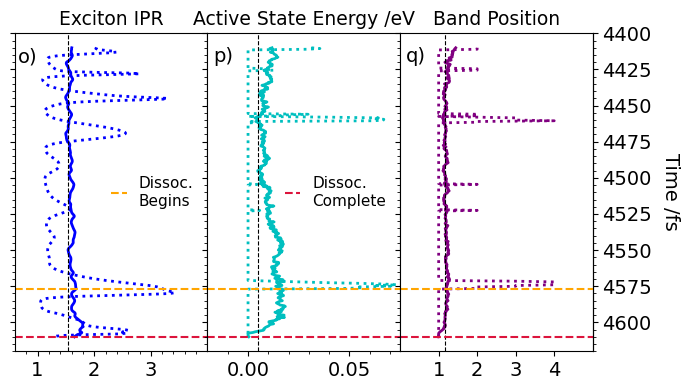

In [11]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(7,4))

time_axis = np.arange(9220-full_dissoc_index,9220+1)*10*0.05

axs[0].plot(mean_exciton_dissoc_IPR[:full_dissoc_index+1], time_axis, color='b', linewidth=2)
axs[0].plot(XT_single_IPR[2, 9220-full_dissoc_index:9220+1], time_axis, color='b', linestyle='dotted', linewidth=2)
axs[0].axvline(mean_exciton_IPR, color='k', linestyle='--', linewidth=0.8)
axs[0].axhline(time_axis[-1], color='crimson', linestyle='--')
axs[0].axhline(time_axis[start_dissoc_index], color='orange', linestyle='--', label = 'Dissoc.' + '\n' + 'Begins')
axs[0].set_title('Exciton IPR', fontsize=13.5)
axs[0].set_xlim([0.6,4])
axs[0].set_ylim([4400,4620])
axs[0].minorticks_on()
axs[0].xaxis.set_tick_params(labelsize = 14)
axs[0].set_yticklabels([])
axs[0].invert_yaxis()
axs[0].set_xticks([ipr for ipr in range(1,4)])
axs[0].text(0.65, 4420, 'o)', fontsize=14)
axs[0].legend(loc='right', fontsize=11, frameon=False, handlelength=1)

axs[1].plot(mean_active_energies[:full_dissoc_index+1]*27.211, time_axis, color='c', linewidth=2)
axs[1].plot(active_state_energies[2, 9220-full_dissoc_index:9220+1]*27.211, time_axis, color='c', linestyle='dotted', linewidth=2)
axs[1].axvline(mean_excitonic_energy*27.211, color='k', linestyle='--', linewidth=0.8)
axs[1].axhline(time_axis[-1], color='crimson', linestyle='--', label = 'Dissoc.' + '\n' + 'Complete')
axs[1].axhline(time_axis[start_dissoc_index], color='orange', linestyle='--')
axs[1].set_title('Active State Energy /eV', fontsize=13.5)
#axs[1].legend(fontsize=12)
axs[1].minorticks_on()
axs[1].set_xlim([-0.02,0.075])
axs[1].yaxis.set_tick_params(labelsize = 14)
axs[1].xaxis.set_tick_params(labelsize = 14)
axs[1].invert_yaxis()
axs[1].text(-0.017, 4420, 'p)', fontsize=14)
axs[1].legend(loc='right', fontsize=11, frameon=False, handlelength=1)

axs[2].plot(mean_energy_ranks[:full_dissoc_index+1], time_axis, color='purple', label='Band position', linewidth=2)
axs[2].plot(active_absolute_rank[2, 9220-full_dissoc_index:9220+1], time_axis, color='purple', linestyle='dotted', linewidth=2)
axs[2].axvline(mean_excitonic_Erank, color='k', linestyle='--', label='Mean position before dissociation', linewidth=0.8)
axs[2].axhline(time_axis[-1], color='crimson', linestyle='--')
axs[2].axhline(time_axis[start_dissoc_index], color='orange', linestyle='--')
axs[2].set_title('Band Position', fontsize=13.5)
axs[2].yaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[2].set_xlim([0,5])
axs[2].xaxis.set_tick_params(labelsize = 14)
axs[2].yaxis.set_tick_params(labelsize = 14)
axs[2].invert_yaxis()
axs[2].set_xticks([1,2,3,4])
axs[2].text(0.15, 4420, 'q)', fontsize=14)

ax2_sec = axs[2].secondary_yaxis('right')
ax2_sec.yaxis.set_tick_params(labelsize = 14)
ax2_sec.set_ylabel('Time /fs', fontsize=14, rotation=270, labelpad=20)
ax2_sec.set_ylim([4400,4620])
ax2_sec.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax2_sec.set_yticks(np.arange(4400,4625,25))

fig.tight_layout()
plt.subplots_adjust(wspace=0.0)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


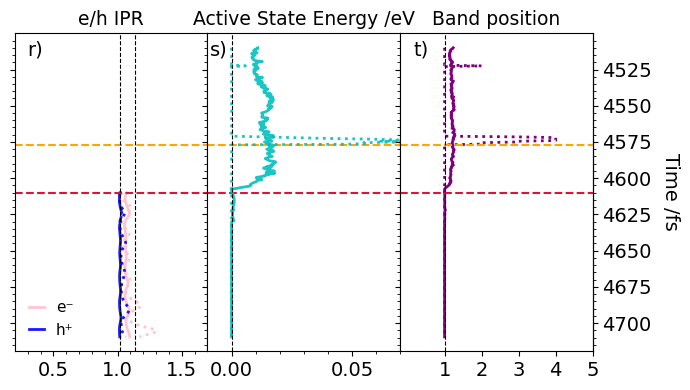

In [20]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(7,4), sharey=True)

time_axis = np.arange(9220-full_dissoc_index,9220+200)*10*0.05

axs[0].plot(mean_electron_dissoc_IPR[full_dissoc_index:full_dissoc_index+200], time_axis[full_dissoc_index:full_dissoc_index+200], color = 'pink', alpha = 0.9, linewidth=2, label = 'e\u207B')
axs[0].plot(mean_hole_dissoc_IPR[full_dissoc_index:full_dissoc_index+200], time_axis[full_dissoc_index:full_dissoc_index+200], color = 'b', alpha = 0.9, label = 'h\u207A', linewidth=2)
axs[0].plot(electron_single_IPR[2, 9220:9220+200], time_axis[full_dissoc_index:full_dissoc_index+200], color = 'pink', alpha = 0.9, linestyle='dotted', linewidth=2)
axs[0].plot(hole_single_IPR[2, 9220:9220+200], time_axis[full_dissoc_index:full_dissoc_index+200], color = 'b', alpha = 0.9, linestyle='dotted', linewidth=2)
axs[0].axhline(time_axis[full_dissoc_index], color='crimson', linestyle='--')
axs[0].axhline(time_axis[start_dissoc_index], color='orange', linestyle='--')
axs[0].axvline(mean_eIPR, color='k', linestyle='--', linewidth=0.8)
axs[0].axvline(mean_hIPR, color='k', linestyle='--', linewidth=0.8)
axs[0].set_title('e/h IPR', fontsize = 13.5)
axs[0].minorticks_on()
axs[0].xaxis.set_tick_params(labelsize = 14)
axs[0].invert_yaxis()
axs[0].set_yticklabels([])
axs[0].set_xlim([0.2,1.7])
#axs[0].set_ylim([4490,4720])
axs[0].set_xticks([0.5, 1, 1.5])
axs[0].set_yticks(np.arange(4500,4725,25))
axs[0].text(0.3, 4515, 'r)', fontsize=14)
axs[0].legend(loc='lower left', fontsize=11, handlelength=1, frameon=False)


#axs[1].plot(mean_dissoc_ct_energy[200:600]*27.211, time_axis[200:], color = 'c', alpha = 0.9, label = 'All CT' + '\n' + 'States', linewidth=2)
#axs[1].plot(ct_energies[2,9220-200:9220+200]*27.211, time_axis[200:], color = 'c', linestyle='dotted', linewidth=2)
#axs[1].plot(mean_dissoc_ict_energy[200:600]*27.211, time_axis[200:], color = 'tomato', alpha = 0.9, label = 'iCT State', linewidth=1)
#axs[1].plot(ict_energies[2,9220-200:9220+200]*27.211, time_axis[200:], color = 'tomato', linestyle='dotted', linewidth=2)
axs[1].axhline(time_axis[full_dissoc_index], color='crimson', linestyle='--')
axs[1].axhline(time_axis[start_dissoc_index], color='orange', linestyle='--')
#axs[1].axvline(mean_ct_energy*27.211, color='k', linestyle='--', linewidth=0.8)
#axs[1].axvline(mean_ict_energy*27.211, color='k', linestyle='--', linewidth=0.8)
#axs[1].set_title('CT Energy /eV', fontsize = 13.5)
axs[1].plot(mean_active_energies[200:600]*27.211, time_axis[200:], color='c', alpha=0.9, linewidth=2)
axs[1].plot(active_state_energies[2,9220-200:9220+200]*27.211, time_axis[200:], color='c', alpha=0.9, linewidth=2, linestyle='dotted')
axs[1].axvline(mean_dissociated_energy, color='k', linestyle='--', linewidth=0.8)
axs[1].set_title('Active State Energy /eV', fontsize=13.5)
axs[1].minorticks_on()
axs[1].xaxis.set_tick_params(labelsize = 14)
axs[1].yaxis.set_tick_params(labelsize = 14)
axs[1].set_xticks([0.0, 0.05])
axs[1].invert_yaxis()
axs[1].set_xlim([-0.01,0.07])
axs[1].text(-0.009, 4515, 's)', fontsize=14)
axs[1].legend(bbox_to_anchor=(0.375,0.4), fontsize=11, handlelength=1, frameon=False)


axs[2].plot(mean_energy_ranks[200:600], time_axis[200:], color = 'purple', linewidth=2)
axs[2].plot(active_absolute_rank[2, 9220-200:9220+200], time_axis[200:], color = 'purple', linestyle='dotted', linewidth=2)
axs[2].axhline(time_axis[full_dissoc_index], color='crimson', linestyle='--')
axs[2].axhline(time_axis[start_dissoc_index], color='orange', linestyle='--')
axs[2].axvline(mean_dissociated_Erank, color='k', linestyle='--', linewidth=0.8)
axs[2].set_title('Band position', fontsize = 13.5)
axs[2].yaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[2].xaxis.set_tick_params(labelsize = 14)
axs[2].set_xlim([-0.2,5])
axs[2].set_xticks([1,2,3,4,5])
axs[2].invert_yaxis()
axs[2].text(0.15, 4515, 't)', fontsize=14)
axs[2].yaxis.set_label_position("right")

ax2_sec = axs[2].secondary_yaxis('right')
ax2_sec.yaxis.set_tick_params(labelsize = 14)
ax2_sec.set_ylabel('Time /fs', fontsize=14, rotation=270, labelpad=20)
ax2_sec.set_ylim([4490,4720])
ax2_sec.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax2_sec.set_yticks(np.arange(4500,4725,25))

# index is [2, 9220:9220+200] for physopt single traj and [195, 4831-200:4831+200] for e5 2xCT single traj
fig.tight_layout()
plt.subplots_adjust(wspace=0.0)

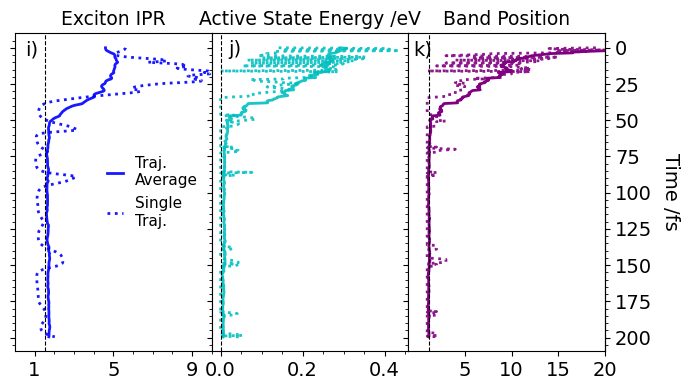

In [19]:
fig, axs = plt.subplots(nrows=1,ncols=3, figsize=(7,4), sharey=True)

simulation_time = np.arange(len(XT_single_IPR[0,:400]))*0.05*10

axs[0].plot(np.mean(XT_single_IPR[:,:400], axis=0), simulation_time, color = 'b', alpha = 0.9, linewidth=2, label = 'Traj.' + '\n' + 'Average')
axs[0].plot(XT_single_IPR[2,:400], simulation_time, color = 'b', alpha = 0.9, linewidth=2, linestyle='dotted', label = 'Single' + '\n' + 'Traj.')
axs[0].axvline(mean_exciton_IPR, color='k', linewidth=0.8, linestyle='--')
axs[0].minorticks_on()
axs[0].xaxis.set_tick_params(labelsize = 14)
axs[0].yaxis.set_tick_params(labelsize = 14)
axs[0].set_title('Exciton IPR', fontsize = 13.5)
axs[0].invert_yaxis()
axs[0].set_yticklabels([])
axs[0].set_yticks(np.arange(0,210,25))
axs[0].set_xticks([1,5,9])
axs[0].set_xlim([0,10])
axs[0].text(0.5, 5, 'i)', fontsize=14)
axs[0].legend(loc='right', fontsize=11, handlelength=1, frameon=False)

#axs[1].plot(np.mean(xt_energies[:,:400], axis=0)*27.211, simulation_time, color = 'c', alpha = 0.9, linewidth=2)
#axs[1].plot(xt_energies[2,:400]*27.211, simulation_time, color = 'c', alpha = 0.9, linewidth=2, linestyle='dotted')
axs[1].plot(np.mean(active_state_energies[:,:400], axis=0)*27.211, simulation_time, color='c', alpha=0.9, linewidth=2)
axs[1].plot(active_state_energies[2,:400]*27.211, simulation_time, color='c', alpha=0.9, linewidth=2, linestyle='dotted')
axs[1].axvline(mean_excitonic_energy, color='k', linewidth=0.8, linestyle='--')
axs[1].minorticks_on()
axs[1].xaxis.set_tick_params(labelsize = 14)
axs[1].yaxis.set_tick_params(labelsize = 14)
axs[1].set_title('Active State Energy /eV', fontsize = 13.5)
axs[1].invert_yaxis()
#axs[1].set_xticks([-0.8, -0.4, 0.0, 0.3])
#axs[1].set_xlim([-0.7,0])
axs[1].text(0.02, 5, 'j)', fontsize=14)

axs[2].plot(np.mean(active_absolute_rank[:,:400], axis=0), simulation_time, color = 'purple', linewidth=2)
axs[2].plot(active_absolute_rank[2,:400], simulation_time, color = 'purple', alpha = 0.9, linewidth=2, linestyle='dotted')
axs[2].axvline(mean_excitonic_Erank, color='k', linewidth=0.8, linestyle='--')
axs[2].yaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[2].xaxis.set_tick_params(labelsize = 14)
axs[2].yaxis.set_tick_params(labelsize = 14)
axs[2].set_title('Band Position', fontsize=13.5)
axs[2].invert_yaxis()
axs[2].set_xlim([-1,20])
axs[2].set_xticks([5,10,15,20])
axs[2].text(-0.5, 5, 'k)', fontsize=14)

ax2_sec = axs[2].secondary_yaxis('right')
ax2_sec.yaxis.set_tick_params(labelsize = 14)
ax2_sec.set_ylabel('Time /fs', fontsize=14, rotation=270, labelpad=20)
ax2_sec.set_ylim([-10,210])
ax2_sec.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax2_sec.set_yticks(np.arange(0,210,25))

fig.tight_layout()
plt.subplots_adjust(wspace=0.0)

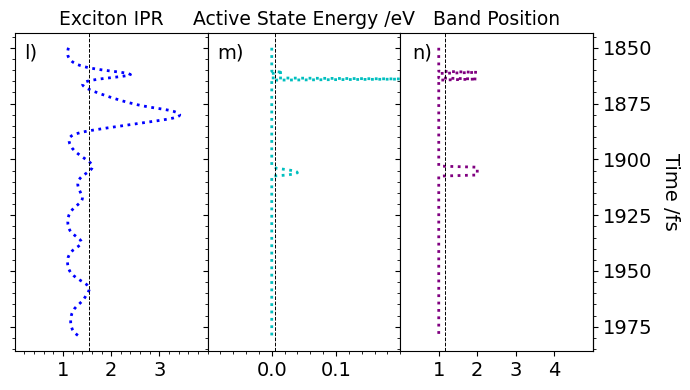

In [25]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(7,4))

time_axis = np.arange(len(XT_single_IPR[0]))*10*0.05

axs[0].plot(XT_single_IPR[2,3700:3960], time_axis[3700:3960], color='b', linestyle='dotted', linewidth=2)
axs[0].axvline(mean_exciton_IPR, color='k', linestyle='--', label='Average', linewidth=0.7)
axs[0].set_title('Exciton IPR', fontsize=13.5)
axs[0].minorticks_on()
axs[0].yaxis.set_tick_params(labelsize = 14)
axs[0].xaxis.set_tick_params(labelsize = 14)
axs[0].set_yticklabels([])
axs[0].set_yticks(np.arange(1850,2000,25))
axs[0].invert_yaxis()
axs[0].set_xticks([1,2,3])
axs[0].set_xlim([0,4])
axs[0].text(0.2, 1855, 'l)', fontsize=14)

axs[1].plot(active_state_energies[2, 3700:3960]*27.211, time_axis[3700:3960], color='c', linestyle='dotted', linewidth=2)
axs[1].axvline(mean_excitonic_energy*27.211, color='k', linestyle='--', label='Mean energy before dissociation', linewidth=0.7)
axs[1].set_title('Active State Energy /eV', fontsize=13.5)
#axs[1].legend(fontsize=12)
axs[1].minorticks_on()
axs[1].set_xlim([-0.1,0.2])
axs[1].yaxis.set_tick_params(labelsize = 14)
axs[1].xaxis.set_tick_params(labelsize = 14)
axs[1].invert_yaxis()
axs[1].set_xticks([0,0.1])
axs[1].text(-0.085, 1855, 'm)', fontsize=14)

axs[2].plot(active_absolute_rank[2, 3700:3960], time_axis[3700:3960], color='purple', linestyle='dotted', linewidth=2)
axs[2].axvline(mean_energy_rank, color='k', linestyle='--', label='Mean position before dissociation', linewidth=0.7)
axs[2].set_title('Band Position', fontsize=13.5)
axs[2].set_xticks([1,2,3,4])
axs[2].set_xlim([0,5])
axs[2].yaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[2].xaxis.set_tick_params(labelsize = 14)
axs[2].yaxis.set_tick_params(labelsize = 14)
axs[2].invert_yaxis()
axs[2].text(0.3, 1855, 'n)', fontsize=14)

ax2_sec = axs[2].secondary_yaxis('right')
ax2_sec.yaxis.set_tick_params(labelsize = 14)
ax2_sec.set_ylabel('Time /fs', fontsize=14, rotation=270, labelpad=20)
ax2_sec.set_ylim([-10,210])
ax2_sec.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax2_sec.set_yticks(np.arange(1850,2000,25))

fig.tight_layout()
plt.subplots_adjust(wspace=0.0)

In [2]:
def plot_DOS(ax_object, path, simulation, state_list, phase, colour_list, width_list, label_list, shading_list, bin_width_list):

    for index in range(len(state_list)):

        energy_array = np.loadtxt(path + f'{simulation}/{simulation}_{state_list[index]}_{phase}DOS.txt')*27.211
        ax_object.hist(energy_array, color=f'{colour_list[index]}', label=f'{label_list[index]}', rwidth=width_list[index], alpha=shading_list[index] ,orientation='horizontal', density=True,  bins=np.arange(-0.5,2.0,bin_width_list[index]))

In [3]:
def bin_energies(energies, number_bins):

    energy_difference = np.max(energies) - np.min(energies)
    bins = np.arange(np.min(energies), np.max(energies) + energy_difference/number_bins, energy_difference/number_bins)
#    bins[-1] = bins[-1] + 1

    bin_indices = np.digitize(energies, bins)
    bar_chart_data = np.zeros((2,len(bins)-1))

    for j in range(1, len(bins)):

        bin_energy = (bins[j] + bins[j-1])/2
        matching_indices = len(np.where(bin_indices == j)[0])

        bar_chart_data[0,j-1] = bin_energy
        bar_chart_data[1,j-1] = matching_indices

    return bar_chart_data

In [4]:
def gaussian_broadening(nom,  y_vals, x_vals, SIGMA):
    '''
    A function given to me by Samuele, which convolutes your transition dipoles with a guassian of width SIGMA, which acts to
    smoothen the spectrum, and perhaps can be said to account for the energy uncertainty associated with the finite lifetime of the 
    excited state.
    '''
    total_y = np.sum(y_vals)
    AB0 = []
    for iom in nom:
        BROAD_ABS=0.0
        for st in range(len(x_vals)):
            BROAD_ABS=BROAD_ABS+y_vals[st]*x_vals[st]*np.exp(-((iom-x_vals[st])**2)/(SIGMA*SIGMA*2.0))
        BROAD_ABS=BROAD_ABS/(len(x_vals)*total_y) # Spano definition
        AB0.append(BROAD_ABS)
    return AB0

In [5]:
def plot_smooth_DOS(ax_object, path, simulation, state_list, phase, colour_list, label_list, shading_list, under_shading_list, sigma_list, width_list):

       for index in range(len(state_list)):

        energy_array = np.loadtxt(path + f'{simulation}/{simulation}_{state_list[index]}_{phase}DOS.txt')*27.211
        energy_bar_data = bin_energies(energy_array, 50)
        
        energy_spacing = energy_bar_data[0,1] - energy_bar_data[0,0]
        initial_zero = np.array([[energy_bar_data[0,0] - energy_spacing], [0.0]])
        trailing_zero = np.array([[energy_bar_data[0,-1] + energy_spacing], [0.0]])

        energy_bar_data = np.hstack((initial_zero, energy_bar_data))
        energy_bar_data = np.hstack((energy_bar_data, trailing_zero))

        energy_bar_data[1] = energy_bar_data[1]/np.sum(energy_bar_data[1])

        broadened_DOS = gaussian_broadening(energy_bar_data[0]+5, energy_bar_data[1], energy_bar_data[0]+5, sigma_list[index])
        broadened_DOS = np.array(broadened_DOS)/np.sum(broadened_DOS)

        ax_object.plot(broadened_DOS, energy_bar_data[0], color=f'{colour_list[index]}', alpha=shading_list[index], linewidth=width_list[index], zorder=1)
        ax_object.fill_betweenx(energy_bar_data[0], broadened_DOS, 0.0, where=(broadened_DOS > 0), color=f'{colour_list[index]}', alpha=under_shading_list[index], label=f'{label_list[index]}')

In [6]:
def plot_zeroK_DOS(ax_object, path, simulation, keyword_list, colour_list, shading_list, width_list, label_list):

    for index in range(len(keyword_list)):

        if keyword_list[index] == 'iCT':
            info_array = np.loadtxt(path + f'/{simulation}/{simulation}_{keyword_list[index]}_bar_info.txt')
            info_array = info_array/1000
            ax_object.barh(info_array, 0.01, color=f'{colour_list[index]}', height=width_list[index], alpha=shading_list[index], hatch=None, label=f'{label_list[index]}')
        else:
            info_array = np.loadtxt(path + f'/{simulation}/{simulation}_{keyword_list[index]}_bar_info.txt')
            info_array[0] = info_array[0]/1000

            if (keyword_list[index] == 'exciton') or (keyword_list[index] == 'hybrid'):
                info_array[1] = info_array[1]*0.01/np.max(info_array[1])
            else:
                info_array[1] = info_array[1]*0.03/np.max(info_array[1])
            
            ax_object.barh(info_array[0], info_array[1], color=f'{colour_list[index]}', height=width_list[index], alpha=shading_list[index], hatch=None, label=f'{label_list[index]}')

"\naxs[1,0].spines['top'].set_visible(False)\naxs[1,0].spines['bottom'].set_visible(False)\naxs[1,0].spines['right'].set_visible(False)\naxs[1,0].set_xticks([])\naxs[1,0].set_xlim([0,0.075])\naxs[1,0].yaxis.set_tick_params(labelsize = 14)\naxs[1,0].minorticks_on()\naxs[1,0].set_ylabel('Eigenstate energy /eV', fontsize=14)\naxs[1,0].set_title('t=50fs', fontsize=14)\n#plot_DOS(axs[1,0], path, 'physopt', states, 'e', colours, widths, states, shadings, bin_widths)\nplot_smooth_DOS(axs[1,0], path, 'physopt', states, 'e', colours, labels, shadings, under_shadings, sigmas, line_widths)\naxs[1,0].text(0.001, 1.90, 'd)', fontsize=14)\n\n\naxs[2,0].spines['top'].set_visible(False)\naxs[2,0].spines['bottom'].set_visible(False)\naxs[2,0].spines['right'].set_visible(False)\naxs[2,0].set_xticks([])\naxs[2,0].set_xlim([0,0.075])\naxs[2,0].yaxis.set_tick_params(labelsize = 14)\naxs[2,0].minorticks_on()\naxs[2,0].set_ylabel('Eigenstate energy /eV', fontsize=14)\naxs[2,0].set_title('Final Timestep', fon

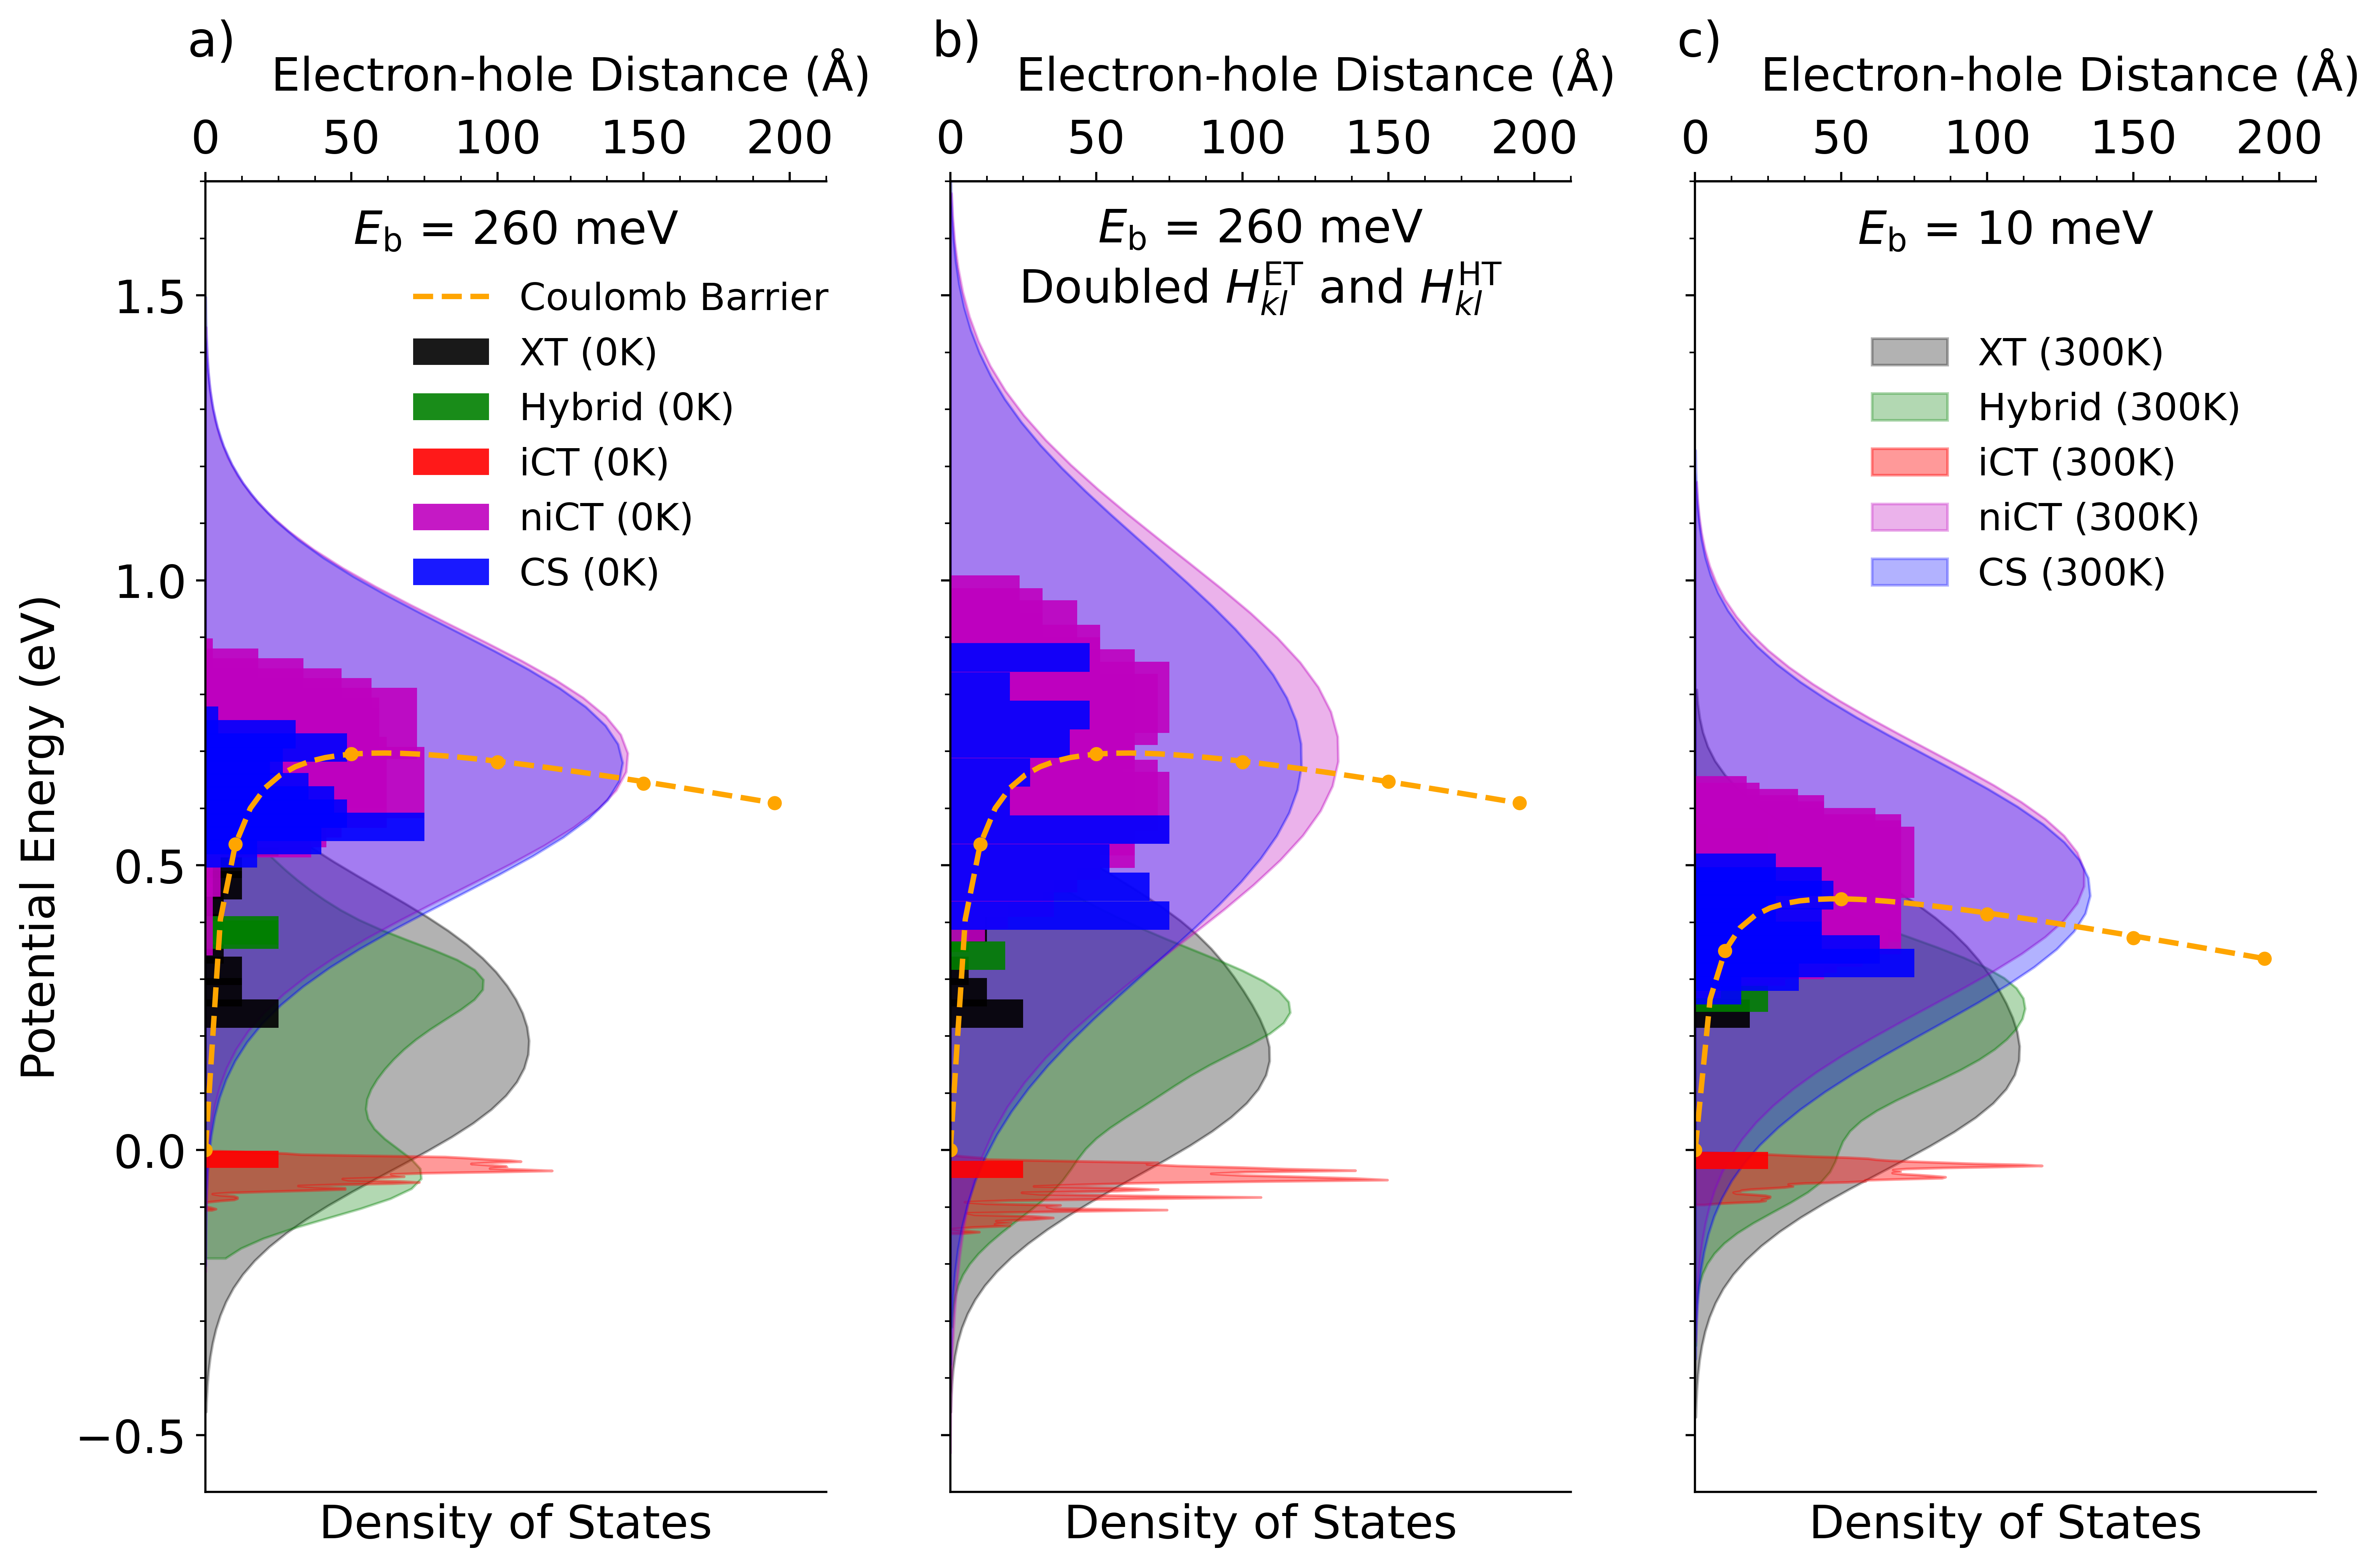

In [7]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(14,8.75), rasterized=True, dpi=500)

path = '/scratch2/fivanovic/T6-PDI-1D/1Dproduction_DOS/single_timesteps/'
#states = ['CT', 'CSS', 'XT', 'H', 'iCT']
states = ['XT', 'H', 'iCT', 'CT', 'CSS']
phases = ['n', 'e', 'f']
#widths = [0.9, 0.9, 0.6, 0.7, 0.9]
widths = [0.6, 0.7, 0.9, 0.9, 0.9]
#colours = ['m', 'b', 'k', 'g', 'r']
colours = ['k', 'g', 'r', 'm', 'b']
#bin_widths = [0.2, 0.2, 0.1, 0.1, 0.1]
bin_widths = [0.1, 0.1, 0.1, 0.2, 0.2]
#sigmas = [0.1, 0.1, 0.075, 0.05, 0.002]
sigmas = [0.075, 0.05, 0.002, 0.1, 0.1]
#labels = ['niCT (300K)', 'CS (300K)', 'XT (300K)', 'Hybrid (300K)', 'iCT (300K)']
labels = ['XT (300K)', 'Hybrid (300K)', 'iCT (300K)', 'niCT (300K)', 'CS (300K)']

#shadings = [0.7, 0.7, 0.7, 0.7, 0.0]
shadings = [0.7, 0.7, 0.0, 0.7, 0.7]
#under_shadings = [0.3, 0.3, 0.3, 0.3, 0.4]
under_shadings = [0.3, 0.3, 0.4, 0.3, 0.3]
#line_widths = [0.1, 0.1, 0.1, 0.1, 3]
line_widths = [0.1, 0.1, 3, 0.1, 0.1]

zeroK_path = '/scratch/fivanovic/Work/X-SH/eigenstate_plotting/zeroK_barchart_data'
#zeroK_states = ['CT', 'CSS', 'hybrid', 'exciton', 'iCT']
zeroK_states = ['exciton', 'hybrid', 'iCT', 'CT', 'CSS']
zeroK_shadings = [0.9, 0.9, 0.9, 0.9, 0.9]
#zeroK_colours = ['m', 'b', 'g', 'k', 'r']
zeroK_colours = ['k', 'g', 'r', 'm', 'b']
#zeroK_labels = ['niCT (0K)', 'CS (0K)', 'Hybrid (0K)', 'XT (0K)', 'iCT (0K)']
zeroK_labels = ['XT (0K)', 'Hybrid (0K)', 'iCT (0K)', 'niCT (0K)', 'CS (0K)']

lattice_x_distances = np.arange(1,40)

e3p5_barrier = [((-0.820/d - 1e-3*1.000*5*d) - (-0.820 - 1e-3*1.000*5)) for d in lattice_x_distances]
e5_barrier = [((-0.540/d - 1e-3*1.000*5*d) - (-0.540 - 1e-3*1.000*5)) for d in lattice_x_distances]
e10_barrier = [((-0.288/d - 1e-3*1.000*5*d) - (-0.288 - 1e-3*1.000*5)) for d in lattice_x_distances]

axs[0].spines['right'].set_visible(False)
axs[0].set_xticks([])
axs[0].set_xlim([0,0.085])
axs[0].yaxis.set_tick_params(labelsize = 17)
axs[0].minorticks_on()
axs[0].set_ylabel('Potential Energy (eV)', fontsize=17)
axs[0].set_title('$E_\mathrm{b}$ = 260 meV', fontsize=17, y=0.94)
#plot_DOS(axs[0,0], path, 'physopt', states, 'n', colours, widths, states, shadings, bin_widths)
plot_smooth_DOS(axs[0], path, 'physopt', states, 'n', colours, ['_nolegend_' for l in range(5)], shadings, under_shadings, sigmas, line_widths)
plot_zeroK_DOS(axs[0], zeroK_path, 'physopt', zeroK_states, zeroK_colours, zeroK_shadings, [0.05, 0.05, 0.03, 0.125, 0.05], zeroK_labels)
axs[0].text(-0.0025, 1.92, 'a)', fontsize=18)
axs[0].set_ylim([-0.6,1.7])
axs[0].set_xlabel('Density of States', fontsize=17)

ax0_sec = axs[0].secondary_xaxis('top')
ax0_sec.set_xticks([0,0.02,0.04,0.06,0.08], [0,50,100,150,200])
axs[0].text(0.009,1.86,'Electron-hole Distance (\u212B)', fontsize=17)
ax0_sec.xaxis.set_tick_params(labelsize = 17)
ax0_sec.minorticks_on()
axs[0].plot(np.arange(0,0.08,0.08/39), e3p5_barrier, linestyle='--', color='orange', linewidth=2, label='Coulomb Barrier')
axs[0].legend(bbox_to_anchor=(0.28,0.66), fontsize=14, frameon=False)
axs[0].scatter([0,0+(0.08*2/39),0.02,0.04,0.06,0.08-(0.08/39)], [e3p5_barrier[0], e3p5_barrier[2], e3p5_barrier[10], e3p5_barrier[20], e3p5_barrier[30], e3p5_barrier[-1]], s=18, color='orange')

axs[1].spines['right'].set_visible(False)
axs[1].set_xticks([])
axs[1].set_xlim([0,0.085])
axs[1].set_title(r'$E_\mathrm{b}$ = 260 meV'  + '\n' + r'Doubled $H^{\mathrm{ET}}_{kl}$ and $H^{\mathrm{HT}}_{kl}$', fontsize=17, y=0.895)
#plot_DOS(axs[0,1], path, 'e10', states, 'n', colours, widths, states, shadings, bin_widths)
plot_smooth_DOS(axs[1], path, 'e3.5_2xCT', states, 'n', colours, labels ,shadings, under_shadings, sigmas, line_widths)
plot_zeroK_DOS(axs[1], zeroK_path, 'e3.5_2xCT', zeroK_states, zeroK_colours, zeroK_shadings, [0.05, 0.05, 0.03, 0.125, 0.05], ['_nolegend_' for l in range(5)])
axs[1].text(-0.0025, 1.92, 'b)', fontsize=18)
axs[1].set_xlabel('Density of States', fontsize=17)

ax1_sec = axs[1].secondary_xaxis('top')
ax1_sec.set_xticks([0,0.02,0.04,0.06,0.08], [0,50,100,150,200])
axs[1].text(0.009,1.86,'Electron-hole Distance (\u212B)', fontsize=17)
ax1_sec.xaxis.set_tick_params(labelsize = 17)
ax1_sec.minorticks_on()
axs[1].plot(np.arange(0,0.08,0.08/39), e3p5_barrier, linestyle='--', color='orange', linewidth=2)
#axs[1].legend(bbox_to_anchor=(0.25,0.73), fontsize=13, frameon=False)
axs[1].scatter([0,0+(0.08*2/39),0.02,0.04,0.06,0.08-(0.08/39)], [e3p5_barrier[0], e3p5_barrier[2], e3p5_barrier[10], e3p5_barrier[20], e3p5_barrier[30]+0.0035, e3p5_barrier[-1]], s=18, color='orange')

axs[2].spines['right'].set_visible(False)
axs[2].set_xticks([])
axs[2].set_xlim([0,0.085])
axs[2].set_title('$E_\mathrm{b}$ = 10 meV', fontsize=17, y=0.94)
#plot_DOS(axs[0,2], path, 'e3.5_3xCT', states, 'n', colours, widths, states, shadings, bin_widths)
plot_smooth_DOS(axs[2], path, 'e5', states, 'n', colours, labels, shadings, under_shadings, sigmas, line_widths)
plot_zeroK_DOS(axs[2], zeroK_path, 'e5', zeroK_states, zeroK_colours, zeroK_shadings, [0.05, 0.05, 0.03, 0.125, 0.05], ['_nolegend_' for l in range(5)])
axs[2].text(-0.0025, 1.92, 'c)', fontsize=18)
axs[2].set_xlabel('Density of States', fontsize=17)
axs[2].legend(bbox_to_anchor=(0.23,0.66), fontsize=14, frameon=False)


ax2_sec = axs[2].secondary_xaxis('top')
ax2_sec.set_xticks([0,0.02,0.04,0.06,0.08], [0,50,100,150,200])
axs[2].text(0.009,1.86,'Electron-hole Distance (\u212B)', fontsize=17)
ax2_sec.xaxis.set_tick_params(labelsize = 17)
ax2_sec.minorticks_on()
axs[2].plot(np.arange(0,0.08,0.08/39), e5_barrier, linestyle='--', color='orange', linewidth=2)
axs[2].scatter([0,0+(0.08*2/39),0.02,0.04,0.06,0.08-(0.08/39)], [e5_barrier[0], e5_barrier[2], e5_barrier[10], e5_barrier[20], e5_barrier[30], e5_barrier[-1]], s=18, color='orange')


'''
axs[1,0].spines['top'].set_visible(False)
axs[1,0].spines['bottom'].set_visible(False)
axs[1,0].spines['right'].set_visible(False)
axs[1,0].set_xticks([])
axs[1,0].set_xlim([0,0.075])
axs[1,0].yaxis.set_tick_params(labelsize = 14)
axs[1,0].minorticks_on()
axs[1,0].set_ylabel('Eigenstate energy /eV', fontsize=14)
axs[1,0].set_title('t=50fs', fontsize=14)
#plot_DOS(axs[1,0], path, 'physopt', states, 'e', colours, widths, states, shadings, bin_widths)
plot_smooth_DOS(axs[1,0], path, 'physopt', states, 'e', colours, labels, shadings, under_shadings, sigmas, line_widths)
axs[1,0].text(0.001, 1.90, 'd)', fontsize=14)


axs[2,0].spines['top'].set_visible(False)
axs[2,0].spines['bottom'].set_visible(False)
axs[2,0].spines['right'].set_visible(False)
axs[2,0].set_xticks([])
axs[2,0].set_xlim([0,0.075])
axs[2,0].yaxis.set_tick_params(labelsize = 14)
axs[2,0].minorticks_on()
axs[2,0].set_ylabel('Eigenstate energy /eV', fontsize=14)
axs[2,0].set_title('Final Timestep', fontsize=14)
#plot_DOS(axs[2,0], path, 'physopt', states, 'f', colours, widths, states, shadings, bin_widths)
plot_smooth_DOS(axs[2,0], path, 'physopt', states, 'f', colours, labels ,shadings, under_shadings, sigmas, line_widths)
axs[2,0].text(0.001, 2.90, 'g)', fontsize=14)


axs[1,1].spines['top'].set_visible(False)
axs[1,1].spines['bottom'].set_visible(False)
axs[1,1].spines['right'].set_visible(False)
axs[1,1].set_xticks([])
axs[1,1].set_xlim([0,0.075])
axs[1,1].set_title('t=50fs', fontsize=14)
#plot_DOS(axs[1,1], path, 'e10', states, 'e', colours, widths, states, shadings, bin_widths)
plot_smooth_DOS(axs[1,1], path, 'e10', states, 'e', colours, labels, shadings, under_shadings, sigmas, line_widths)
axs[1,1].text(0.001, 1.90, 'e)', fontsize=14)

axs[2,1].spines['top'].set_visible(False)
axs[2,1].spines['bottom'].set_visible(False)
axs[2,1].spines['right'].set_visible(False)
axs[2,1].set_xticks([])
axs[2,1].set_xlim([0,0.075])
axs[2,1].set_title('Final Timestep', fontsize=14)
#plot_DOS(axs[2,1], path, 'e10', states, 'f', colours, widths, states, shadings, bin_widths)
plot_smooth_DOS(axs[2,1], path, 'e10', states, 'f', colours, labels, shadings, under_shadings, sigmas, line_widths)
axs[2,1].text(0.001, 2.90, 'h)', fontsize=14)

axs[1,2].spines['top'].set_visible(False)
axs[1,2].spines['bottom'].set_visible(False)
axs[1,2].spines['right'].set_visible(False)
axs[1,2].set_xticks([])
axs[1,2].set_xlim([0,0.075])
axs[1,2].set_title('t=50fs', fontsize=14)
#plot_DOS(axs[1,2], path, 'e3.5_3xCT', states, 'e', colours, widths, states, shadings, bin_widths)
plot_smooth_DOS(axs[1,2], path, 'e5_2xCT', states, 'e', colours, labels, shadings, under_shadings, sigmas, line_widths)
axs[1,2].text(0.001, 1.90, 'f)', fontsize=14)


axs[2,2].spines['top'].set_visible(False)
axs[2,2].spines['bottom'].set_visible(False)
axs[2,2].spines['right'].set_visible(False)
axs[2,2].set_xticks([])
axs[2,2].set_xlim([0,0.075])
axs[2,2].set_title('Final Timestep', fontsize=14)
#plot_DOS(axs[2,2], path, 'e3.5_3xCT', states, 'f', colours, widths, states, shadings, bin_widths)
plot_smooth_DOS(axs[2,2], path, 'e3.5_3xCT', states, 'f', colours, labels, shadings, under_shadings, sigmas, line_widths)
axs[2,2].text(0.001, 2.90, 'i)', fontsize=14)
'''

Text(0.5, 0, 'Density of States')

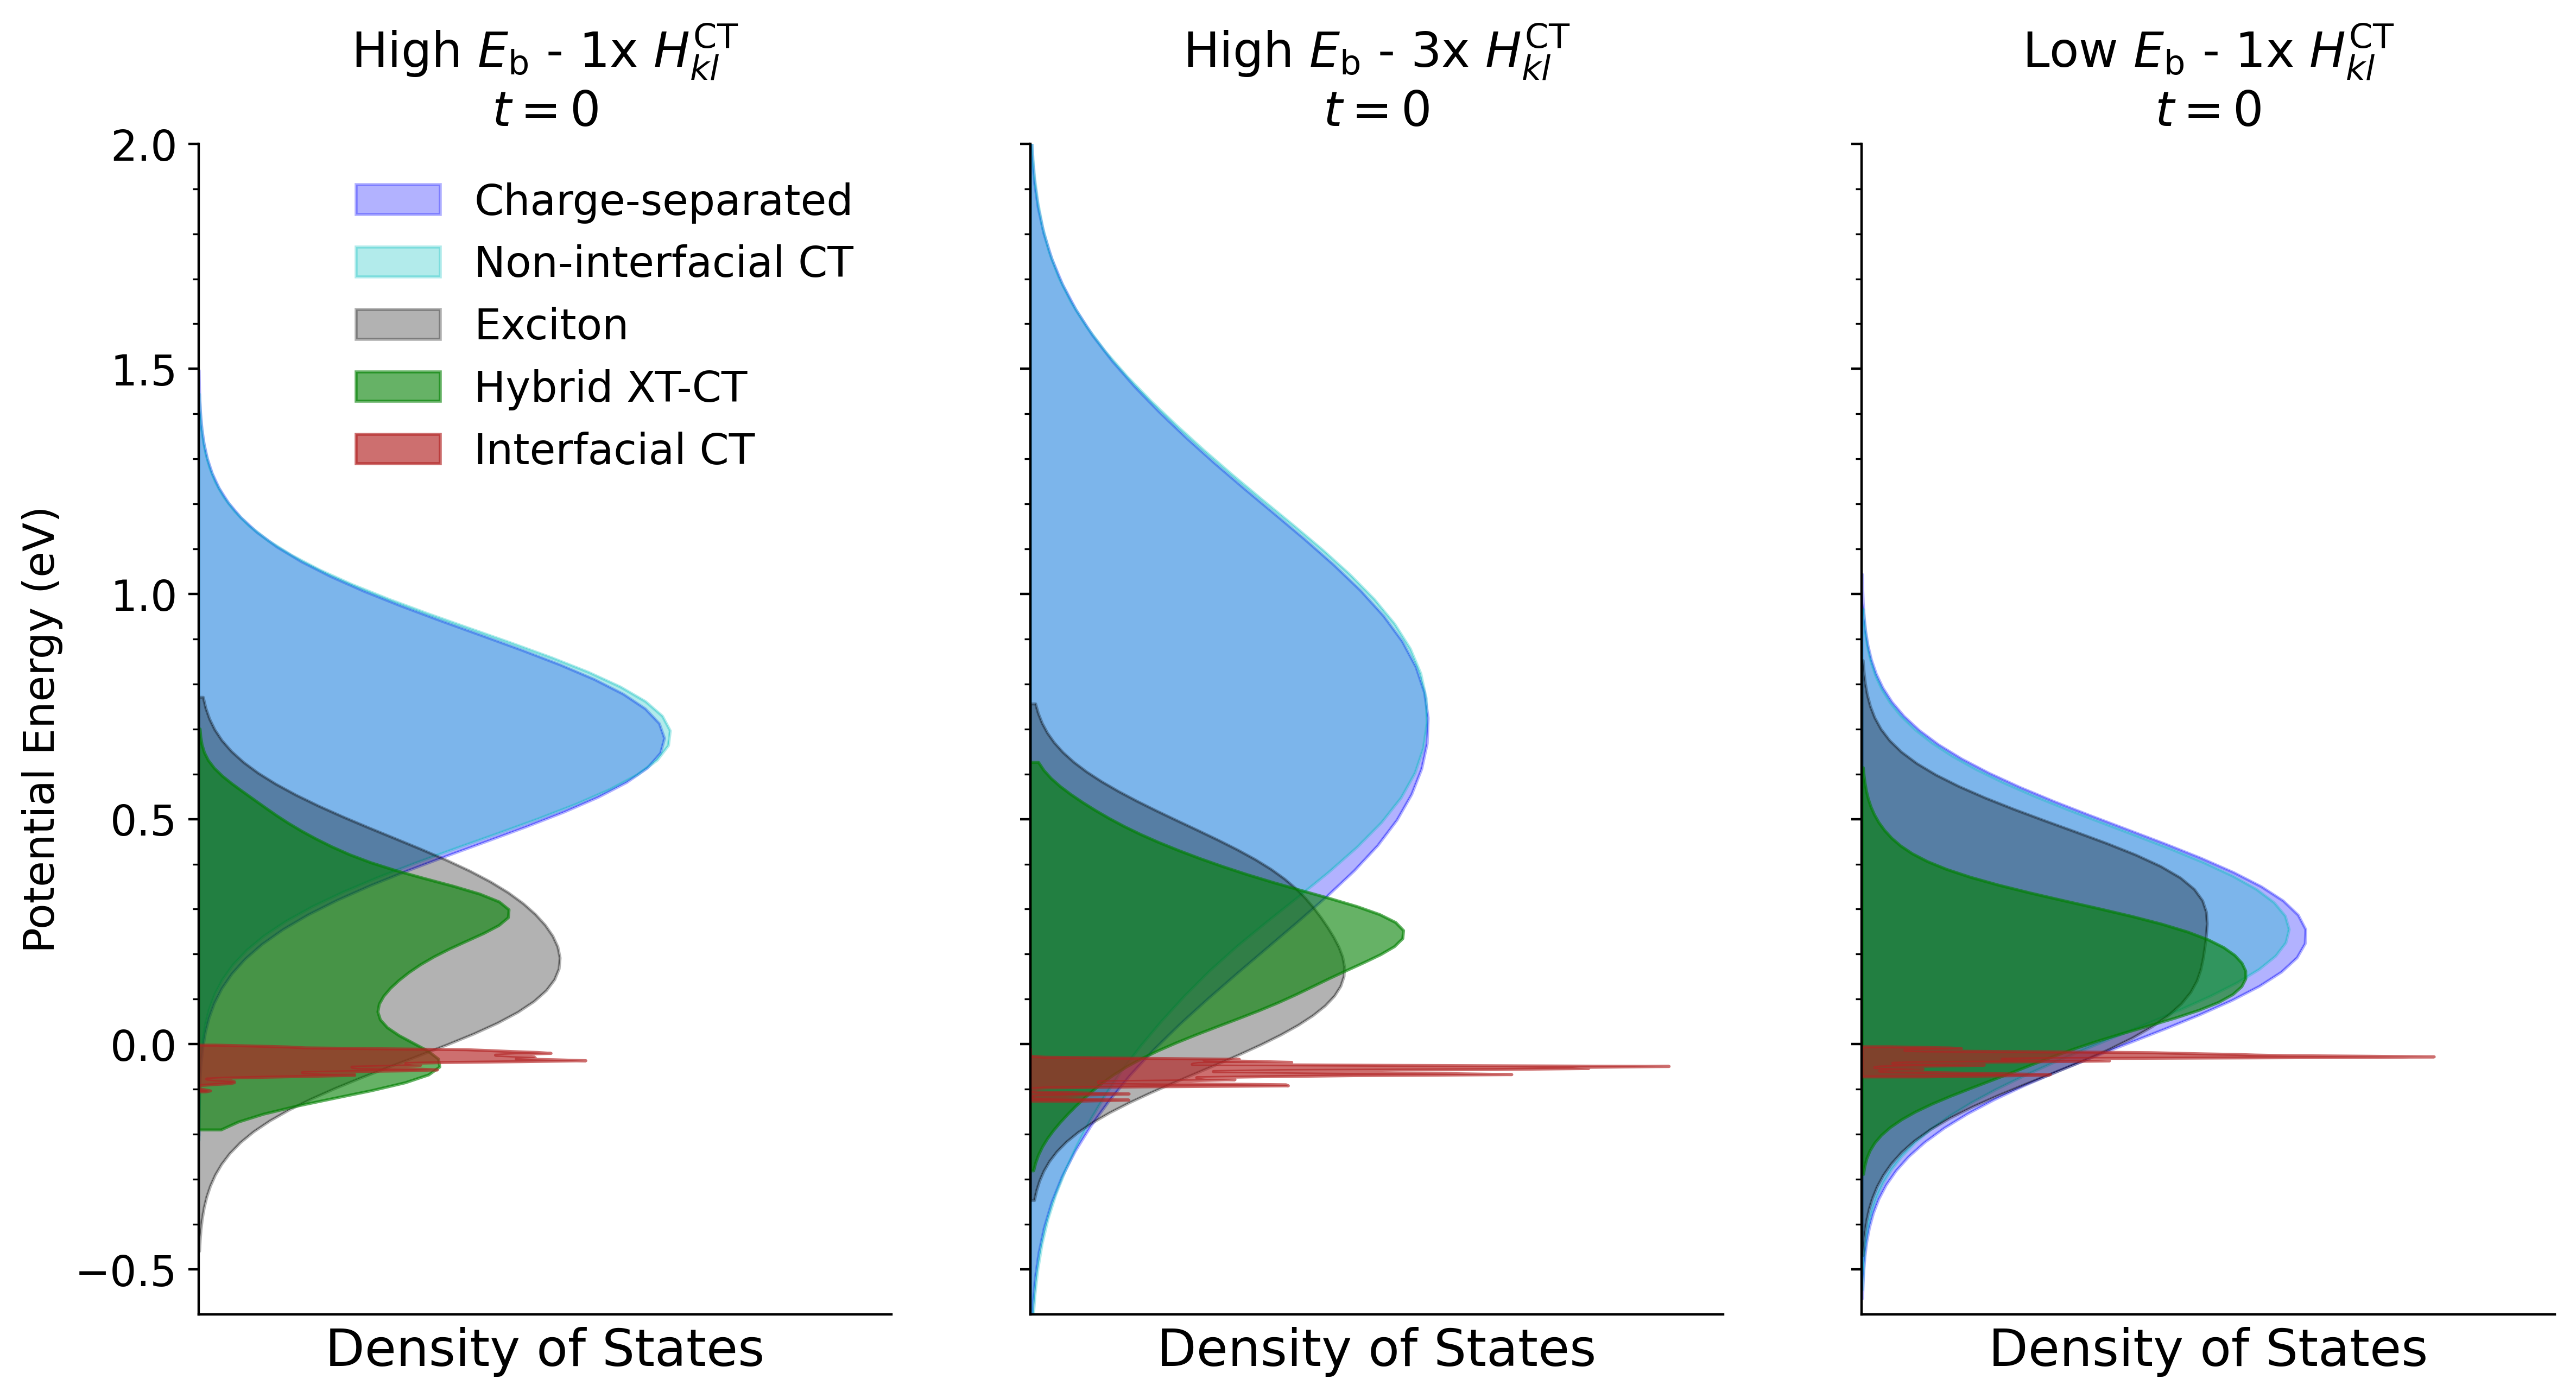

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(14,7), rasterized=True, dpi=400)

path = '/scratch2/fivanovic/T6-PDI-1D/1Dproduction_DOS/single_timesteps/'
states = ['CSS', 'CT', 'XT', 'H', 'iCT']
#states = ['XT', 'H', 'iCT', 'CT', 'CSS']
phases = ['n', 'e', 'f']
widths = [0.9, 0.9, 0.6, 0.7, 0.9]
#widths = [0.6, 0.7, 0.9, 0.9, 0.9]
colours = ['b', 'c', 'k', 'green', 'firebrick']
#colours = ['k', 'g', 'r', 'm', 'b']
bin_widths = [0.2, 0.2, 0.1, 0.1, 0.1]
#bin_widths = [0.1, 0.1, 0.1, 0.2, 0.2]
sigmas = [0.1, 0.1, 0.075, 0.05, 0.002]
#sigmas = [0.075, 0.05, 0.002, 0.1, 0.1]
labels = ['Charge-separated', 'Non-interfacial CT', 'Exciton', 'Hybrid XT-CT', 'Interfacial CT']
#labels = ['Exciton', 'Hybrid XT-CT', 'Interfacial CT', 'Non-interfacial CT', 'Charge-separated']

shadings = [0.7, 0.7, 0.7, 0.7, 0.0]
#shadings = [0.7, 0.7, 0.0, 0.7, 0.7]
under_shadings = [0.3, 0.3, 0.3, 0.6, 0.65]
#under_shadings = [0.3, 0.3, 0.4, 0.3, 0.3]
line_widths = [0.1, 0.1, 0.1, 0.1, 3]
#line_widths = [0.1, 0.1, 3, 0.1, 0.1]

zeroK_path = '/scratch/fivanovic/Work/X-SH/eigenstate_plotting/zeroK_barchart_data'
#zeroK_states = ['CT', 'CSS', 'hybrid', 'exciton', 'iCT']
zeroK_states = ['exciton', 'hybrid', 'iCT', 'CT', 'CSS']
zeroK_shadings = [0.9, 0.9, 0.9, 0.9, 0.9]
#zeroK_colours = ['m', 'b', 'g', 'k', 'r']
zeroK_colours = ['k', 'g', 'r', 'm', 'b']
#zeroK_labels = ['niCT (0K)', 'CS (0K)', 'Hybrid (0K)', 'XT (0K)', 'iCT (0K)']
zeroK_labels = ['XT (0K)', 'Hybrid (0K)', 'iCT (0K)', 'niCT (0K)', 'CS (0K)']

lattice_x_distances = np.arange(1,40)

e3p5_barrier = [((-0.820/d - 1e-3*1.000*5*d) - (-0.820 - 1e-3*1.000*5)) for d in lattice_x_distances]
e5_barrier = [((-0.540/d - 1e-3*1.000*5*d) - (-0.540 - 1e-3*1.000*5)) for d in lattice_x_distances]
e10_barrier = [((-0.288/d - 1e-3*1.000*5*d) - (-0.288 - 1e-3*1.000*5)) for d in lattice_x_distances]

axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)
axs[0].set_xticks([])
axs[0].set_xlim([0,0.085])
axs[0].yaxis.set_tick_params(labelsize = 14)
axs[0].minorticks_on()
axs[0].set_ylabel('Potential Energy (eV)', fontsize=14)
axs[0].set_title(r'High $E_\mathrm{b}$ - 1x $H^{\mathrm{CT}}_{kl}$' + '\n' + '$t=0$', fontsize=16)
#plot_DOS(axs[0,0], path, 'physopt', states, 'n', colours, widths, states, shadings, bin_widths)
plot_smooth_DOS(axs[0], path, 'physopt', states, 'n', colours, labels, shadings, under_shadings, sigmas, line_widths)
axs[0].set_ylim([-0.6,2])
axs[0].set_xlabel('Density of States', fontsize=17)
#axs[0].legend(bbox_to_anchor=(0.23,0.70), fontsize=14, frameon=False)
axs[0].legend(loc='upper right', fontsize=14, frameon=False)

axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)
axs[1].set_xticks([])
axs[1].set_xlim([0,0.085])
axs[1].set_title(r'High $E_\mathrm{b}$ - 3x $H^{\mathrm{CT}}_{kl}$' + '\n' + '$t=0$', fontsize=16)
#plot_DOS(axs[0,1], path, 'e10', states, 'n', colours, widths, states, shadings, bin_widths)
plot_smooth_DOS(axs[1], path, 'e3.5_3xCT', states, 'n', colours, labels ,shadings, under_shadings, sigmas, line_widths)
axs[1].set_xlabel('Density of States', fontsize=17)

axs[2].spines['right'].set_visible(False)
axs[2].spines['top'].set_visible(False)
axs[2].set_xticks([])
axs[2].set_xlim([0,0.085])
axs[2].set_title(r'Low $E_\mathrm{b}$ - 1x $H^{\mathrm{CT}}_{kl}$' + '\n' + '$t=0$', fontsize=16)
#plot_DOS(axs[0,2], path, 'e3.5_3xCT', states, 'n', colours, widths, states, shadings, bin_widths)
plot_smooth_DOS(axs[2], path, 'e10', states, 'n', colours, labels, shadings, under_shadings, sigmas, line_widths)
axs[2].set_xlabel('Density of States', fontsize=17)